# Time series data is sequential data where the order of observations matters. It is used in forecasting, anomaly detection, financial modeling, etc. Preprocessing ensures data quality and prepares it for models.
#### Preprocessing Time Series Data for Machine Learning
#### 
#### 1. Key Preprocessing Techniques
#### ✅ 1.1 Handling Missing Values
#### Time series data often has missing timestamps or values. Common techniques include:
#### 
#### Forward Fill (ffill)
#### Backward Fill (bfill)
#### Interpolation
#### Predictive Imputation
#### Example in Python

In [3]:

import pandas as pd
import numpy as np

# Creating a sample time series dataset
date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='D')
data = {'Date': date_rng, 'Value': [10, np.nan, 15, np.nan, 20, 25, np.nan, 30, np.nan, 40]}
df = pd.DataFrame(data).set_index('Date')

print("Original Data:\n", df)

# Forward Fill
df_ffill = df.ffill()

df_bfill = df.backfill()


# Interpolation
df_interp = df.interpolate()

print("\nForward Fill:\n", df_ffill)
print("\nback Fill:\n", df_bfill)
print("\nInterpolated:\n", df_interp)





Original Data:
             Value
Date             
2024-01-01   10.0
2024-01-02    NaN
2024-01-03   15.0
2024-01-04    NaN
2024-01-05   20.0
2024-01-06   25.0
2024-01-07    NaN
2024-01-08   30.0
2024-01-09    NaN
2024-01-10   40.0

Forward Fill:
             Value
Date             
2024-01-01   10.0
2024-01-02   10.0
2024-01-03   15.0
2024-01-04   15.0
2024-01-05   20.0
2024-01-06   25.0
2024-01-07   25.0
2024-01-08   30.0
2024-01-09   30.0
2024-01-10   40.0

back Fill:
             Value
Date             
2024-01-01   10.0
2024-01-02   15.0
2024-01-03   15.0
2024-01-04   20.0
2024-01-05   20.0
2024-01-06   25.0
2024-01-07   30.0
2024-01-08   30.0
2024-01-09   40.0
2024-01-10   40.0

Interpolated:
             Value
Date             
2024-01-01   10.0
2024-01-02   12.5
2024-01-03   15.0
2024-01-04   17.5
2024-01-05   20.0
2024-01-06   25.0
2024-01-07   27.5
2024-01-08   30.0
2024-01-09   35.0
2024-01-10   40.0


/tmp/ipykernel_20271/3277378522.py:14: FutureWarning: DataFrame.backfill/Series.backfill is deprecated. Use DataFrame.bfill/Series.bfill instead
  df_bfill = df.backfill()



#### Comparison of Missing Value Handling Methods
#### 
#### Method	Best for	Pros	Cons
#### Forward Fill	Slowly changing data	Simple, fast	May propagate errors
#### Backward Fill	Quickly changing data	Fills missing values	Can introduce bias
#### Interpolation	Smooth trends	Preserves trends	May not work for complex data
#### Predictive Imputation	Complex patterns	Uses ML models	Requires computation
#### ✅ 1.2 Handling Outliers
#### Outliers can distort predictions. We detect and handle them using:
#### 
#### Z-score method
#### Interquartile Range (IQR)
#### Rolling window smoothing
#### Example in Python

In [5]:

from scipy import stats

# Detecting Outliers using Z-score
df['Z-score'] = np.abs(stats.zscore(df['Value'], nan_policy='omit'))
df_outliers = df[df['Z-score'] > 1]  # Threshold set at 2

print("\nOutliers Detected:\n", df_outliers)



Outliers Detected:
             Value   Z-score
Date                       
2024-01-01   10.0  1.352247
2024-01-10   40.0  1.690309


#### 
#### Comparison of Outlier Detection Methods
#### 
#### Method	Best for	Pros	Cons
#### Z-score	Normally distributed data	Simple, effective	Affected by skewed data
#### IQR	Non-normal data	Robust against skewed data	May miss subtle outliers
#### Rolling Mean	Smoothing fluctuations	Preserves trends	Can lose important spikes
#### ✅ 1.3 Handling Time Format and Indexing
#### Setting a datetime index allows efficient time-based operations.
#### 
#### Example in Python
#### 

In [6]:

df.index = pd.to_datetime(df.index)  # Convert to datetime
df = df.asfreq('D')  # Set frequency to daily
print("\nTime Indexed Data:\n", df.head())



Time Indexed Data:
             Value   Z-score
Date                       
2024-01-01   10.0  1.352247
2024-01-02    NaN       NaN
2024-01-03   15.0  0.845154
2024-01-04    NaN       NaN
2024-01-05   20.0  0.338062



#### ⏳ Why?
#### 
#### Ensures proper time-based operations.
#### Detects irregular time gaps.
#### ✅ 1.4 Feature Engineering for Time Series
#### Since raw timestamps are not useful, we extract useful features:
#### 
#### Temporal Features: Hour, day, month, year.
#### Lag Features: Previous time step values.
#### Rolling Statistics: Moving average, standard deviation.
#### Fourier Transforms: For frequency-based signals.
#### Example in Python



In [9]:
df = df_interp
# Creating Temporal Features
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday

# Creating Lag Features
df['Lag_1'] = df['Value'].shift(1)

# Creating Rolling Statistics
df['Rolling_Mean'] = df['Value'].rolling(window=2).mean()

print("\nFeature-Engineered Data:\n", df.head())



Feature-Engineered Data:
             Value  Day  Month  Weekday  Lag_1  Rolling_Mean
Date                                                       
2024-01-01   10.0    1      1        0    NaN           NaN
2024-01-02   12.5    2      1        1   10.0         11.25
2024-01-03   15.0    3      1        2   12.5         13.75
2024-01-04   17.5    4      1        3   15.0         16.25
2024-01-05   20.0    5      1        4   17.5         18.75



#### Comparison of Feature Engineering Techniques
#### 
#### Method	Best for	Pros	Cons
#### Lag Features	Autoregressive models	Captures dependencies	Can increase dimensionality
#### Rolling Mean	Trend detection	Smooths data	Can remove important variations
#### Fourier Transform	Periodic data	Captures seasonality	Requires expertise
#### ✅ 1.5 Normalization & Scaling
#### Most models require scaled time series data to perform well.
#### 
#### MinMax Scaling (0 to 1 range)
#### Standardization (Mean = 0, Variance = 1)
#### Log Transformation (For reducing large variations)
#### Example in Python


In [10]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
df['Scaled_Value'] = scaler.fit_transform(df[['Value']])

print("\nScaled Data:\n", df[['Value', 'Scaled_Value']].head())



Scaled Data:
             Value  Scaled_Value
Date                           
2024-01-01   10.0      0.000000
2024-01-02   12.5      0.083333
2024-01-03   15.0      0.166667
2024-01-04   17.5      0.250000
2024-01-05   20.0      0.333333



#### Comparison of Scaling Methods
#### 
#### Method	Best for	Pros	Cons
#### MinMax Scaling	Neural networks	Preserves shape	Sensitive to outliers
#### Standardization	Normal distributions	Robust to outliers	Can distort non-normal data
#### Log Transformation	Exponential growth data	Reduces skewness	Can't handle zero values
#### ✅ 1.6 Decomposition (Trend, Seasonality, Residual)
#### Time series often have:
#### 
#### Trend (long-term movement).
#### Seasonality (repeating patterns).
#### Residual (Noise).
#### We decompose time series to analyze these components.
#### 
#### Example in Python


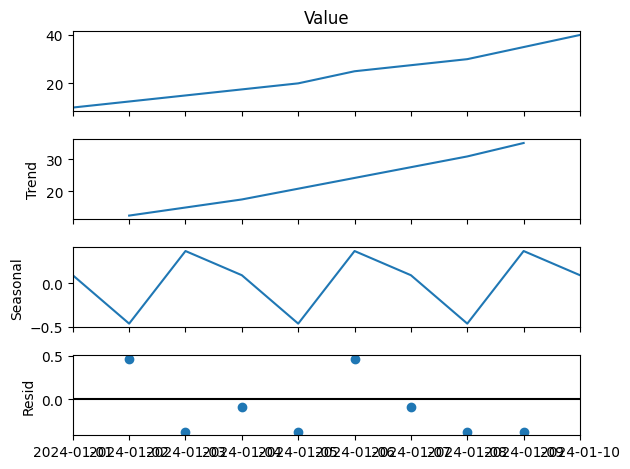

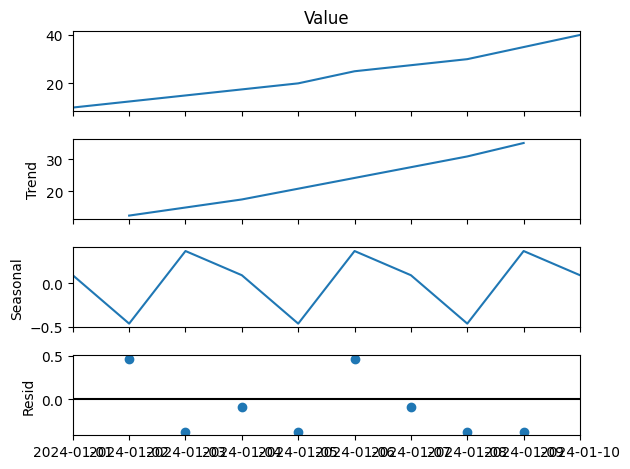

In [11]:

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Value'], model='additive', period=3)
decomposition.plot()



#### 📊 Why?
#### 
#### Helps in removing seasonality before training models.
#### ✅ 1.7 Stationarity Check & Differencing
#### Most ML models assume stationary data (constant mean & variance).
#### If not, we difference the time series to remove trends.
#### 
#### Example in Python


In [12]:

from statsmodels.tsa.stattools import adfuller

# ADF Test for Stationarity
adf_test = adfuller(df['Value'].dropna())
print("\nADF Test p-value:", adf_test[1])

# Differencing
df['Diff'] = df['Value'].diff()



ADF Test p-value: 0.9980444162278252



#### Comparison of Stationarity Methods
#### Method	Best for	Pros	Cons
#### Differencing	Removing trends	Simple, effective	Can lose information
#### Transformations (log, sqrt)	Financial data	Reduces skewness	Can't handle negatives
#### 2. Comparison of Time Series Preprocessing Techniques
#### Technique	Best For	Pros	Cons
#### Missing Value Imputation	Incomplete data	Restores data integrity	Can introduce bias
#### Outlier Detection	Noisy datasets	Removes anomalies	Can remove real trends
#### Datetime Indexing	All time series tasks	Enables time-based operations	None
#### Feature Engineering	Improving model performance	Adds informative features	Increases complexity
#### Scaling & Normalization	Deep learning models	Standardizes input	May lose interpretability
#### Decomposition	Seasonality/trend analysis	Identifies key components	Computationally expensive
#### Differencing	Making data stationary	Ensures stationarity	Can remove important info
#### Final Thoughts
#### Basic models (ARIMA, Linear Regression) → Focus on stationarity and feature engineering.
#### Deep learning models (LSTMs, Transformers) → Need scaling, embeddings, and complex features.
#### Financial & sensor data → Need outlier detection, missing value handling, and decomposition.


#### 1. Resampling
#### 🔹 What is it?
#### Resampling converts irregular or high-frequency time series into a uniform time interval (e.g., daily, weekly, monthly). It is used when the data has missing timestamps or different frequencies.
#### 
#### Common Resampling Methods
#### Upsampling (Increase frequency, e.g., hourly → minutely)
#### Downsampling (Reduce frequency, e.g., daily → weekly)
#### Aggregation (Mean, sum, min, max)
#### Example in Python

In [13]:

import pandas as pd
import numpy as np

# Create a sample time series
date_rng = pd.date_range(start='2024-01-01', periods=10, freq='D')
df = pd.DataFrame({'Date': date_rng, 'Value': np.random.randint(10, 100, size=(10))})
df.set_index('Date', inplace=True)

print("Original Data:\n", df)

# Downsampling to weekly frequency (Mean aggregation)
df_weekly = df.resample('W').mean()

# Upsampling to hourly frequency (Forward Fill)
df_hourly = df.resample('H').ffill()

print("\nDownsampled (Weekly):\n", df_weekly)
print("\nUpsampled (Hourly):\n", df_hourly.head())


Original Data:
             Value
Date             
2024-01-01     91
2024-01-02     52
2024-01-03     69
2024-01-04     91
2024-01-05     11
2024-01-06     11
2024-01-07     55
2024-01-08     43
2024-01-09     92
2024-01-10     91

Downsampled (Weekly):
                 Value
Date                 
2024-01-07  54.285714
2024-01-14  75.333333

Upsampled (Hourly):
                      Value
Date                      
2024-01-01 00:00:00     91
2024-01-01 01:00:00     91
2024-01-01 02:00:00     91
2024-01-01 03:00:00     91
2024-01-01 04:00:00     91


/tmp/ipykernel_20271/2784217556.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df.resample('H').ffill()


#### Comparison of Resampling Methods
#### Method	Use Case	Pros	Cons
#### Downsampling	Reducing data size	Smooths fluctuations	Loss of details
#### Upsampling	Creating high-frequency data	Fills missing points	Artificial data creation
#### Aggregation	Summarizing trends	Preserves trends	May lose insights
#### 2. Detrending & Deseasonalization
#### 🔹 What is it?
#### Detrending removes long-term trends to stabilize data.
#### Deseasonalization removes recurring patterns (e.g., daily temperature cycles).
#### Methods
#### Moving Averages (Smooth trends)
#### Differencing (First-order or seasonal)
#### Seasonal Decomposition (Separates trend, seasonality, and noise)
#### Example in Python


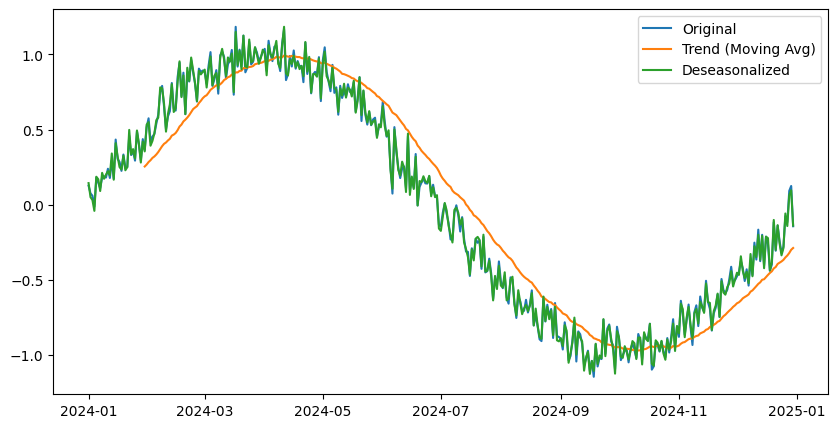

In [14]:

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic seasonal data
date_rng = pd.date_range(start='2024-01-01', periods=365, freq='D')
df = pd.DataFrame({'Date': date_rng, 'Value': np.sin(2 * np.pi * date_rng.dayofyear / 365) + np.random.normal(0, 0.1, 365)})
df.set_index('Date', inplace=True)

# Detrending using moving average
df['Trend'] = df['Value'].rolling(window=30).mean()

# Seasonal decomposition
decomp = seasonal_decompose(df['Value'], model='additive', period=30)
df['Deseasonalized'] = df['Value'] - decomp.seasonal

# Plot results
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Value'], label='Original')
plt.plot(df.index, df['Trend'], label='Trend (Moving Avg)')
plt.plot(df.index, df['Deseasonalized'], label='Deseasonalized')
plt.legend()
plt.show()


#### Method	Best for	Pros	Cons
#### Comparison of Detrending Methods
#### Moving Average	Smooth trends	Easy to apply	Can lag behind
#### Differencing	Removing trends	Works well for ARIMA models	Can introduce noise
#### Seasonal Decomposition	Extracting trends & seasonality	Provides insights	Computationally expensive
#### 3. Lag Features
#### 🔹 What is it?
#### Lag features use past values to capture temporal dependencies, making them essential for autoregressive models.
#### 
#### Example in Python

In [15]:

# Create lag features
df['Lag_1'] = df['Value'].shift(1)
df['Lag_7'] = df['Value'].shift(7)  # Weekly dependency

print("\nLag Feature Data:\n", df.head(10))



Lag Feature Data:
                Value  Trend  Deseasonalized     Lag_1     Lag_7
Date                                                           
2024-01-01  0.127104    NaN        0.144667       NaN       NaN
2024-01-02  0.076484    NaN        0.051310  0.127104       NaN
2024-01-03  0.060563    NaN        0.031525  0.076484       NaN
2024-01-04 -0.011096    NaN       -0.039951  0.060563       NaN
2024-01-05  0.182410    NaN        0.187014 -0.011096       NaN
2024-01-06  0.146859    NaN        0.170325  0.182410       NaN
2024-01-07  0.111156    NaN        0.092094  0.146859       NaN
2024-01-08  0.180638    NaN        0.212941  0.111156  0.127104
2024-01-09  0.189385    NaN        0.173558  0.180638  0.076484
2024-01-10  0.181933    NaN        0.200930  0.189385  0.060563



#### Comparison of Lag Features
#### Lag Size	Use Case	Pros	Cons
#### Short lags (1-3)	Autoregressive models	Captures local dependencies	May ignore long-term trends
#### Medium lags (7, 14, 30)	Seasonal effects	Good for weekly/monthly patterns	Increases complexity
#### Long lags (365)	Yearly patterns	Captures annual trends	Large data requirement
#### 4. Rolling Window Statistics
#### 🔹 What is it?
#### Rolling window statistics compute moving averages, standard deviations, and trends, helping in feature extraction.
#### 
#### Example in Python


In [16]:

df['Rolling_Mean'] = df['Value'].rolling(window=7).mean()
df['Rolling_Std'] = df['Value'].rolling(window=7).std()

print("\nRolling Statistics:\n", df.head(10))



Rolling Statistics:
                Value  Trend  Deseasonalized     Lag_1     Lag_7  Rolling_Mean  \
Date                                                                            
2024-01-01  0.127104    NaN        0.144667       NaN       NaN           NaN   
2024-01-02  0.076484    NaN        0.051310  0.127104       NaN           NaN   
2024-01-03  0.060563    NaN        0.031525  0.076484       NaN           NaN   
2024-01-04 -0.011096    NaN       -0.039951  0.060563       NaN           NaN   
2024-01-05  0.182410    NaN        0.187014 -0.011096       NaN           NaN   
2024-01-06  0.146859    NaN        0.170325  0.182410       NaN           NaN   
2024-01-07  0.111156    NaN        0.092094  0.146859       NaN      0.099069   
2024-01-08  0.180638    NaN        0.212941  0.111156  0.127104      0.106716   
2024-01-09  0.189385    NaN        0.173558  0.180638  0.076484      0.122845   
2024-01-10  0.181933    NaN        0.200930  0.189385  0.060563      0.140184   

     

#### Comparison of Rolling Statistics
#### Metric	Use Case	Pros	Cons
#### Rolling Mean	Trend smoothing	Reduces noise	Can lag behind
#### Rolling Std Dev	Detecting volatility	Identifies variability	Sensitive to window size
#### Rolling Min/Max	Detecting peaks	Captures extreme values	May need fine-tuning
#### 5. Fourier Transform
#### 🔹 What is it?
#### Fourier Transform converts time series from time domain to frequency domain, revealing periodic components.
#### 
#### Example in Python

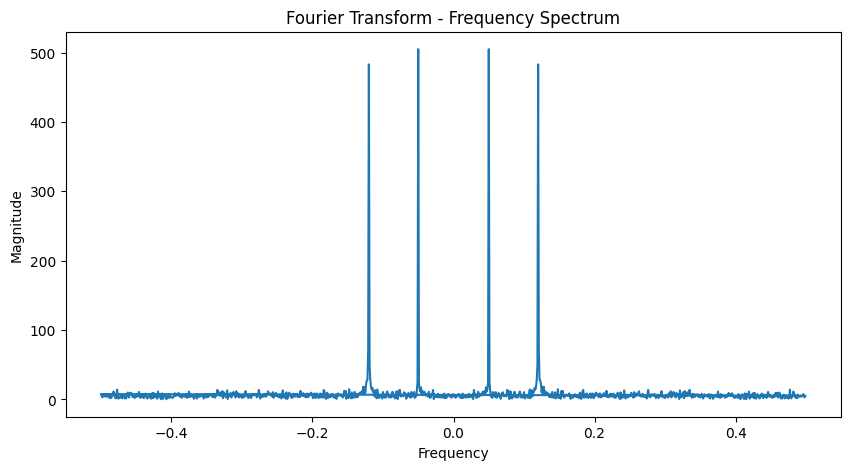

In [17]:

import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic periodic data
t = np.linspace(0, 1, 1000)
signal = np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t) + np.random.normal(0, 0.2, 1000)

# Compute Fourier Transform
freq = np.fft.fftfreq(len(t))
fft_values = np.fft.fft(signal)

# Plot Frequency Spectrum
plt.figure(figsize=(10,5))
plt.plot(freq, np.abs(fft_values))
plt.title("Fourier Transform - Frequency Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()


#### Why Use Fourier Transform?
#### Identifies hidden periodicities (e.g., weekly, monthly, yearly cycles).
#### Used in speech, vibration analysis, and economic trends.
#### Comparison of Fourier Transform
#### Method	Use Case	Pros	Cons
#### Fourier Transform	Identifying periodicity	Reveals hidden cycles	Doesn't work well with non-stationary data
#### Wavelet Transform	Complex signals	Captures local variations	More computationally expensive
#### Final Comparison Table
#### Method	Best for	Pros	Cons
#### Resampling	Handling irregular time gaps	Standardizes time steps	May lose detail
#### Detrending/Deseasonalization	Stabilizing data	Improves model accuracy	Can distort signals
#### Lag Features	Autoregressive models	Captures dependencies	High dimensionality
#### Rolling Statistics	Feature extraction	Detects trends and volatility	Sensitive to window size
#### Fourier Transform	Periodic data analysis	Identifies hidden cycles	Requires interpretation
#### Conclusion
#### 📌 If you are working with forecasting models (ARIMA, LSTMs) → Detrending, Lag Features, and Rolling Statistics are crucial.
#### 📌 If you are handling irregular timestamps → Resampling is key.
#### 📌 If your data has seasonal cycles → Fourier Transform and Seasonal Decomposition are useful.
